# Trend analysis

* [Trend analysis of total views per month](#total-views)

In [7]:
%load_ext autoreload
%autoreload 2


from IPython.display import display, Markdown
from mfnf import MFNF


def md(text):
    display(Markdown(text))


df = MFNF().aggregate_pageviews()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <span id='total-views'>Trend analysis of total views per month</span>

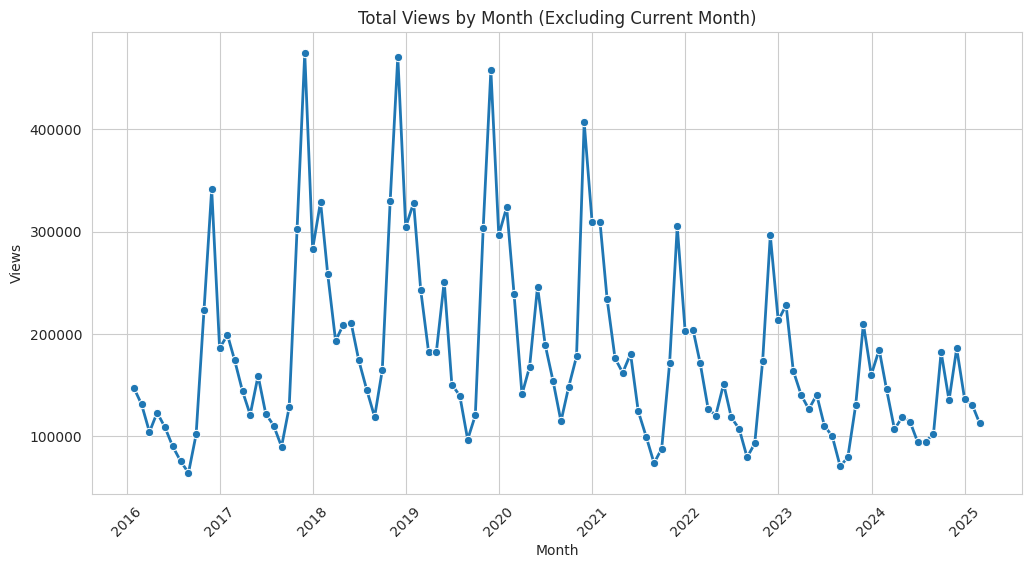

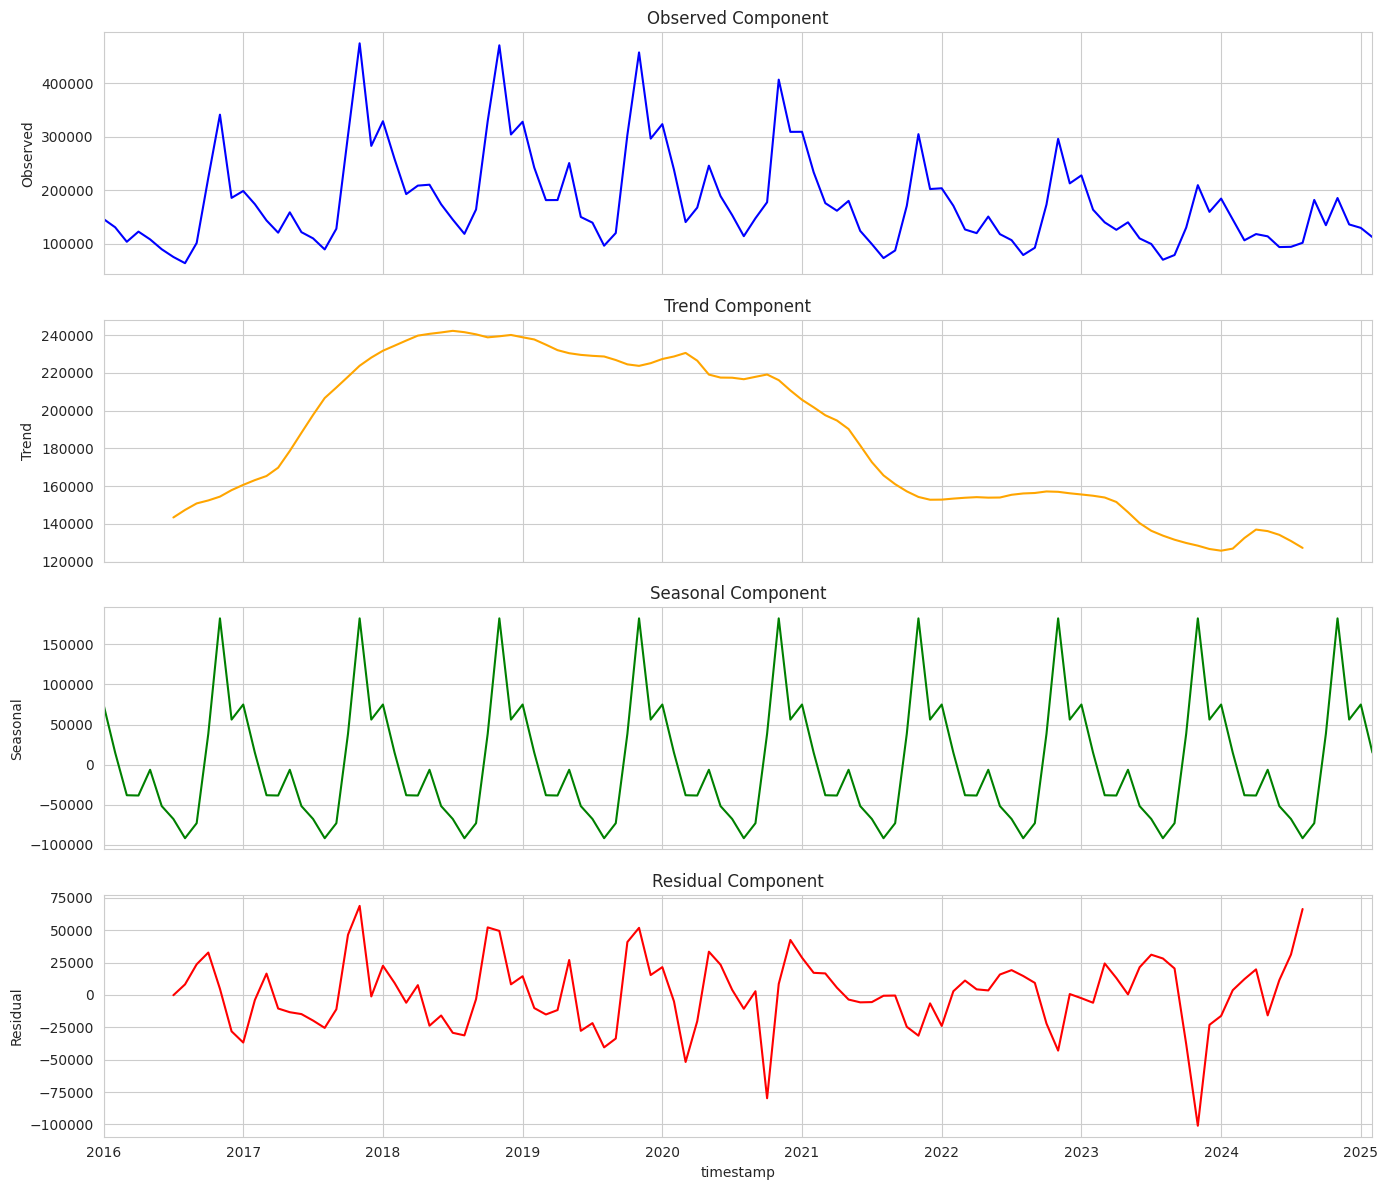

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

def show_trend_analysis(df):
    # Assuming `df` is your DataFrame
    # Ensure 'timestamp' is of datetime dtype
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Filter out the current month
    current_date = datetime.now()
    df_filtered = df[(df['timestamp'].dt.year < current_date.year) | 
                     ((df['timestamp'].dt.year == current_date.year) & (df['timestamp'].dt.month < current_date.month))]
    
    # Set the 'timestamp' as the index
    df_filtered.set_index('timestamp', inplace=True)
    
    # Resample to get monthly view data
    monthly_views = df_filtered['views'].resample('ME').sum()
    
    # Decompose the series
    decomposition = seasonal_decompose(monthly_views.dropna(), model='additive', period=12)
    
    # Set style for seaborn
    sns.set_style("whitegrid")
    
    # Plot the monthly views using Seaborn
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=monthly_views.index, y=monthly_views.values, marker='o', linewidth=2)
    plt.title('Total Views by Month (Excluding Current Month)')
    plt.xlabel('Month')
    plt.ylabel('Views')
    plt.xticks(rotation=45)
    plt.show()
    
    # Plot the decomposition
    fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
    
    decomposition.observed.plot(ax=axs[0], color='blue')
    axs[0].set_ylabel('Observed')
    axs[0].set_title('Observed Component')
    
    decomposition.trend.plot(ax=axs[1], color='orange')
    axs[1].set_ylabel('Trend')
    axs[1].set_title('Trend Component')
    
    decomposition.seasonal.plot(ax=axs[2], color='green')
    axs[2].set_ylabel('Seasonal')
    axs[2].set_title('Seasonal Component')
    
    decomposition.resid.plot(ax=axs[3], color='red')
    axs[3].set_ylabel('Residual')
    axs[3].set_title('Residual Component')
    
    plt.tight_layout()
    plt.show()

md("## <span id='total-views'>Trend analysis of total views per month</span>")
show_trend_analysis(df.copy())

## <span id="per-book">Trend analysis per book</span>

### Analysis 1

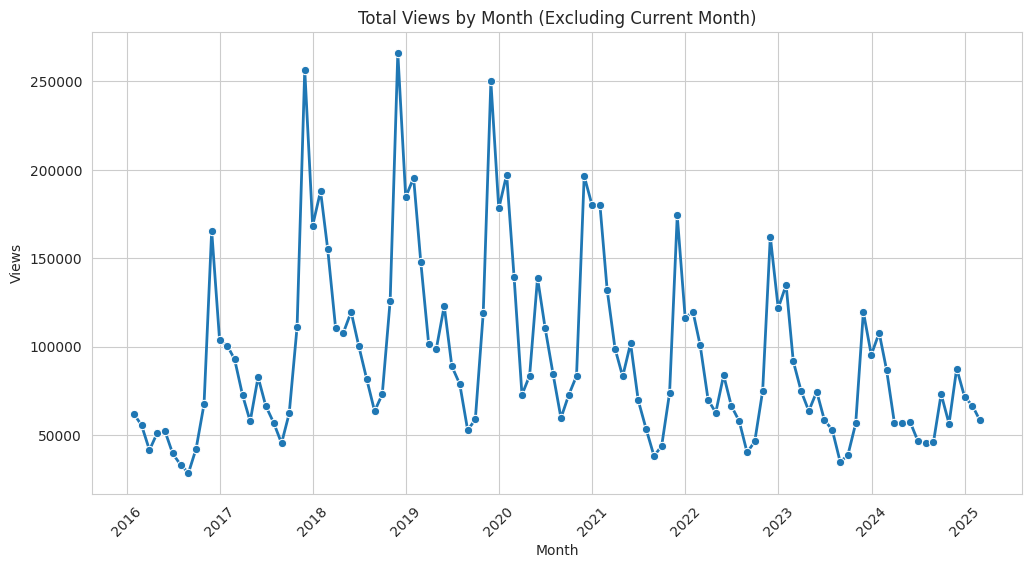

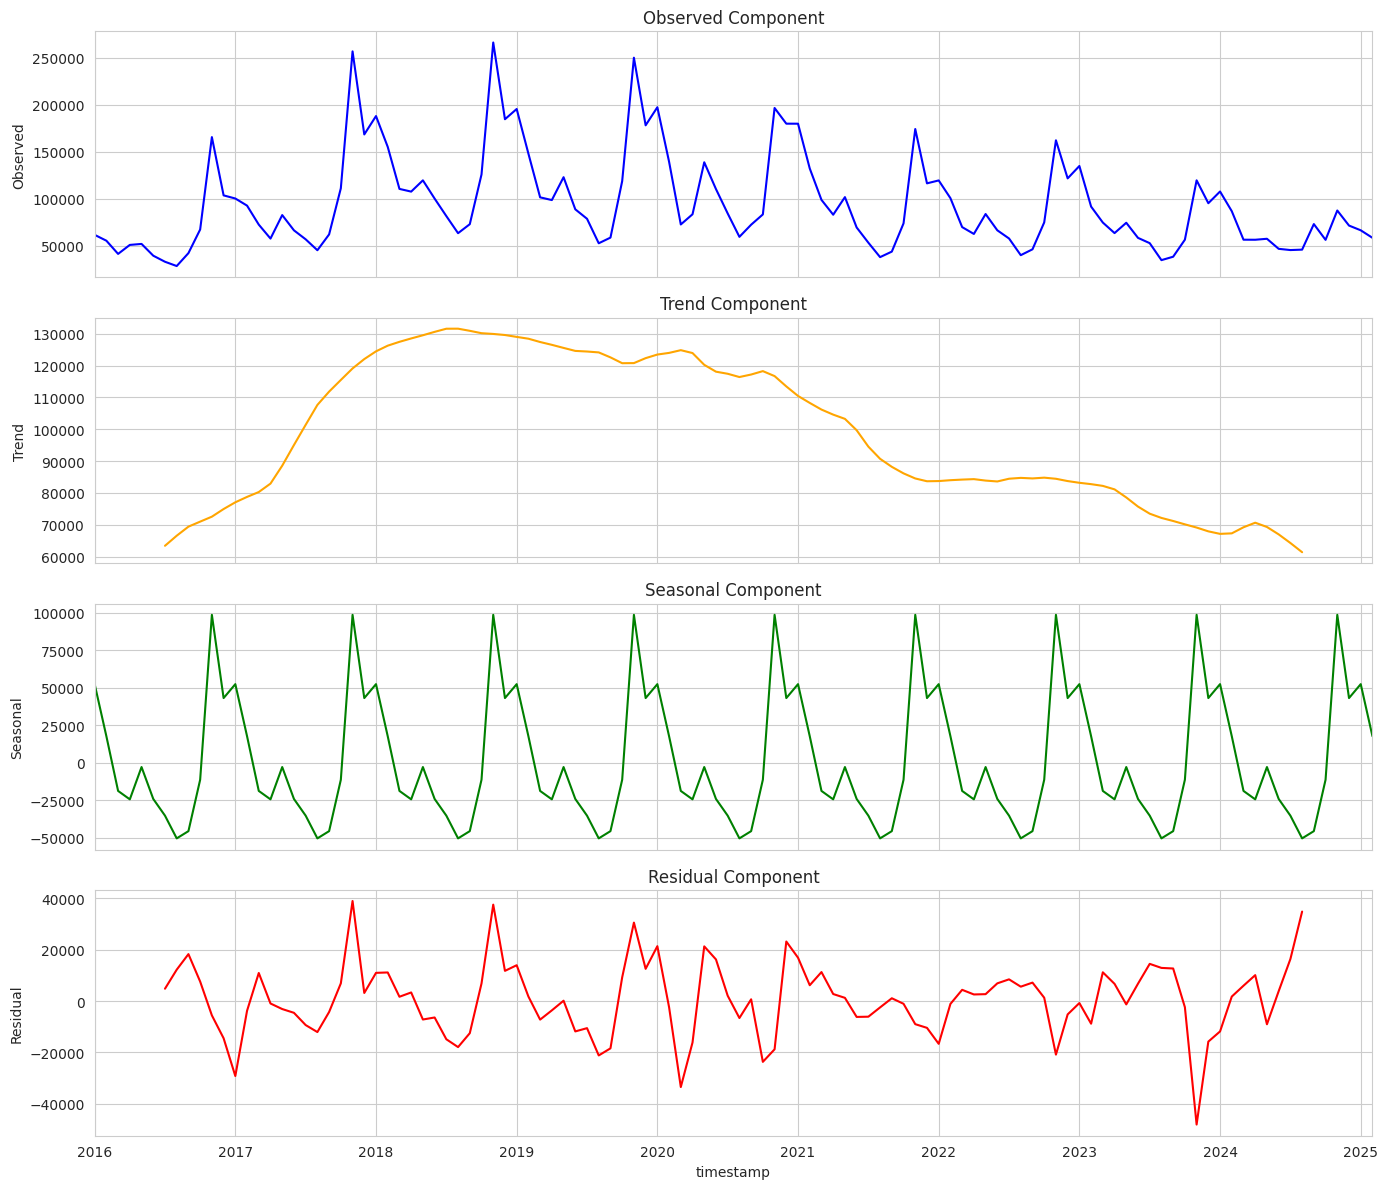

### Grundlagen der Mathematik

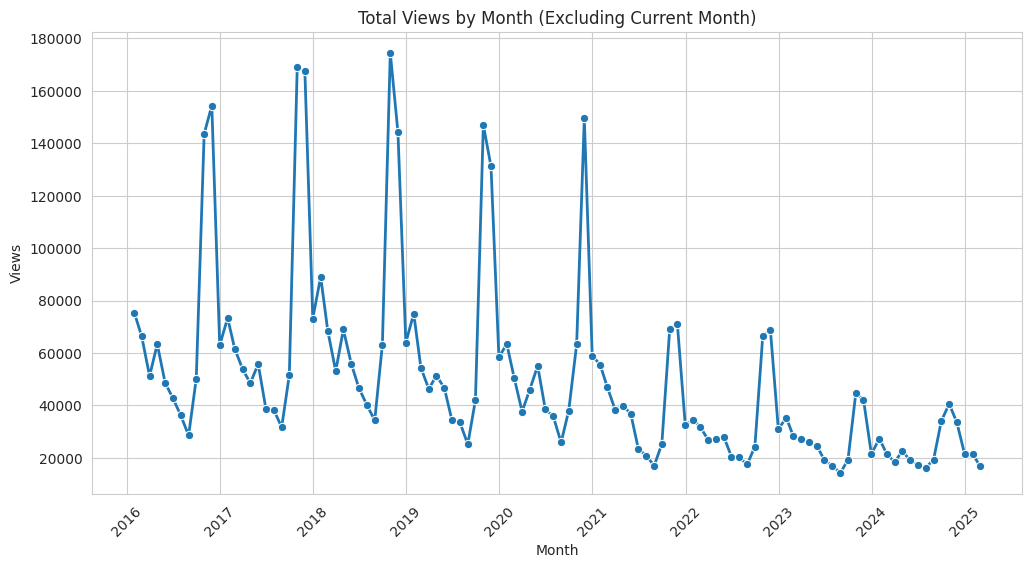

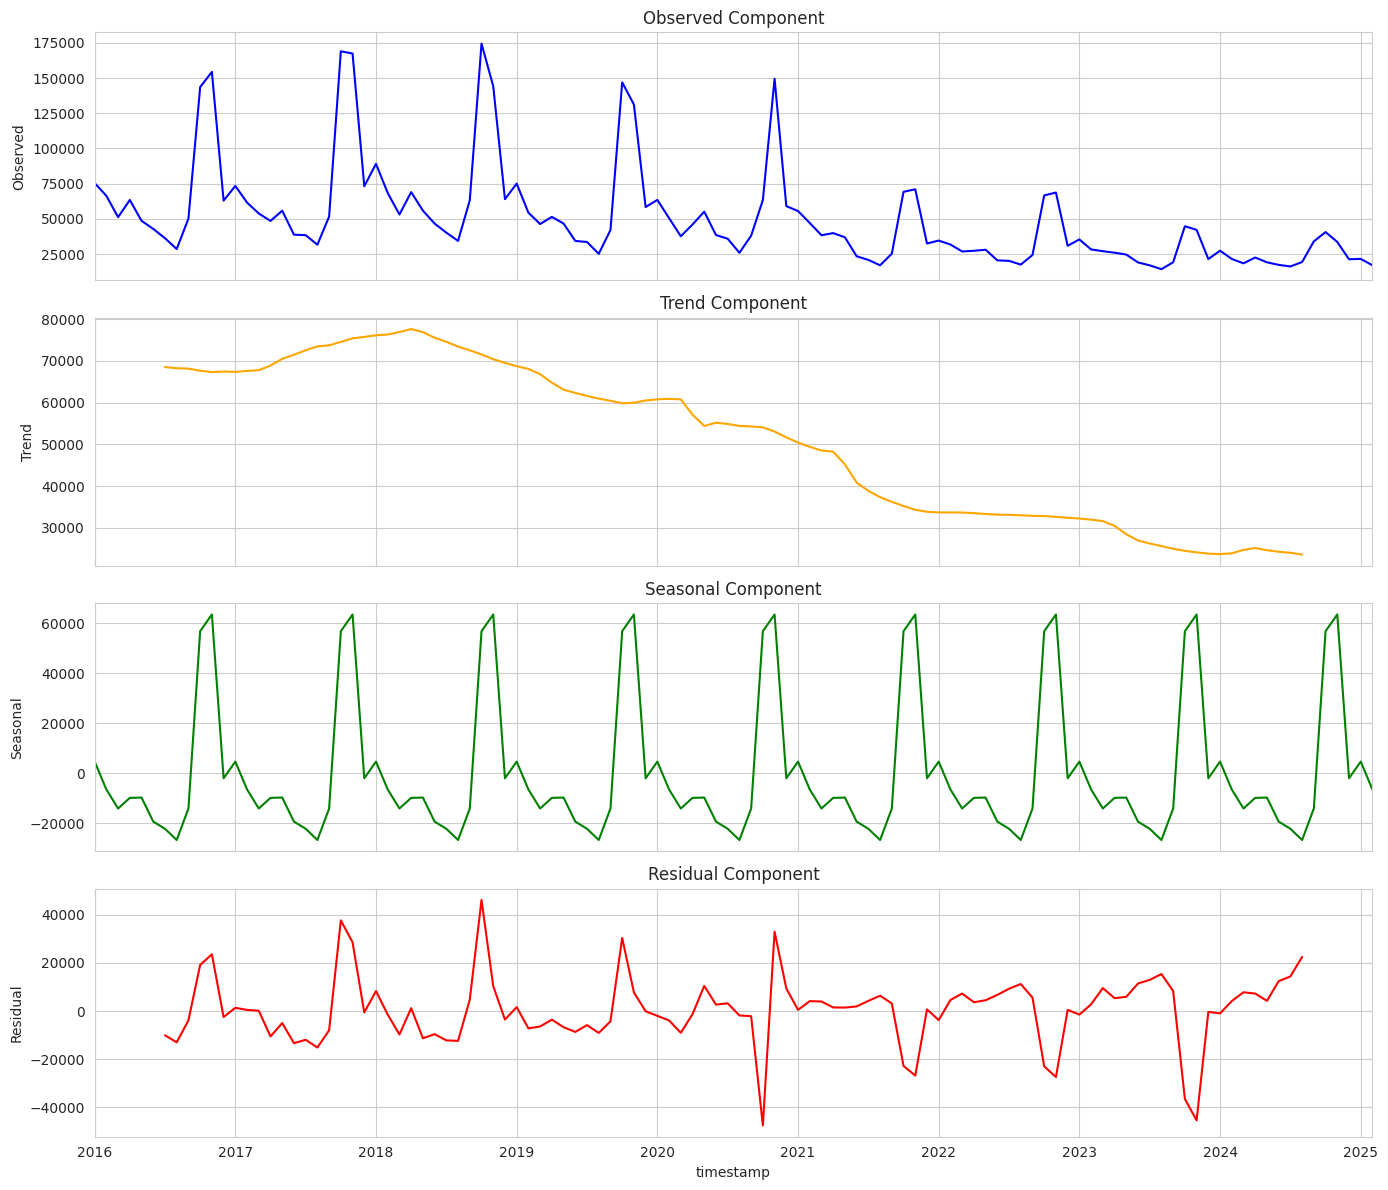

### Lineare Algebra 1

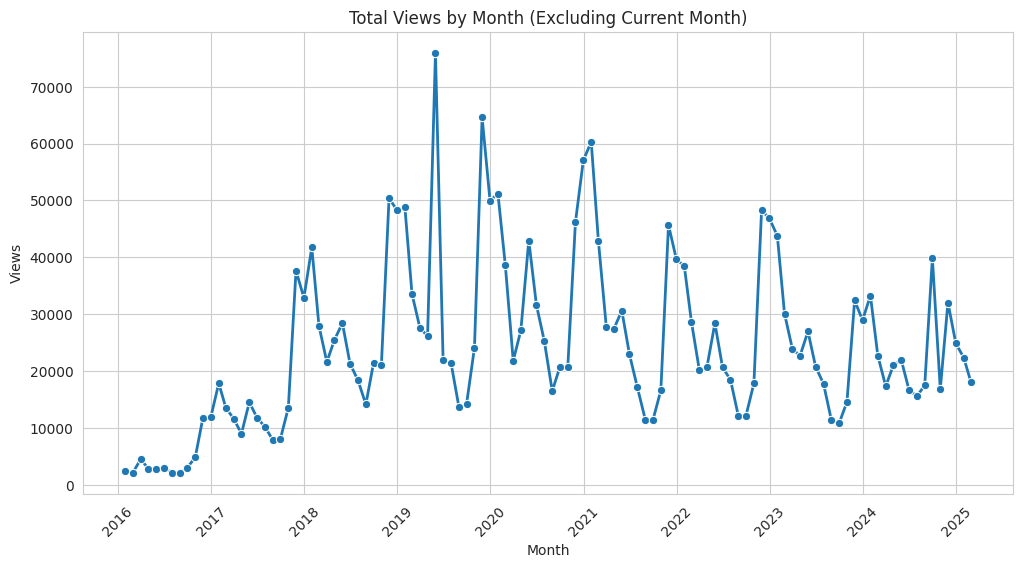

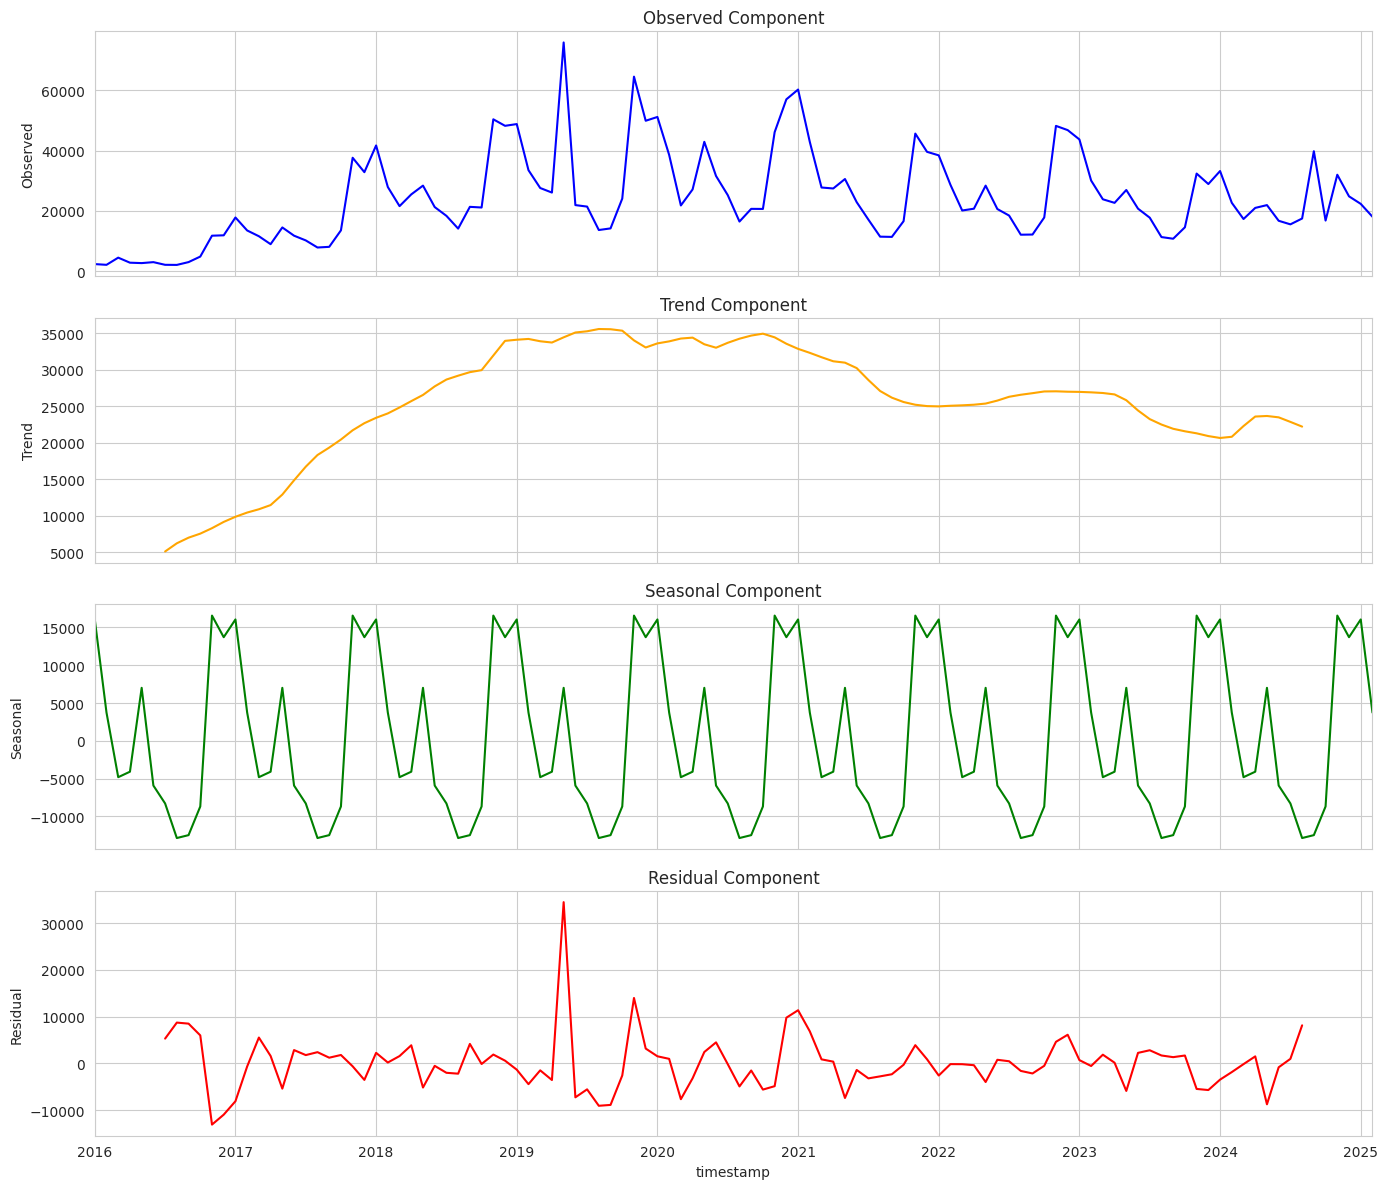

### Maßtheorie

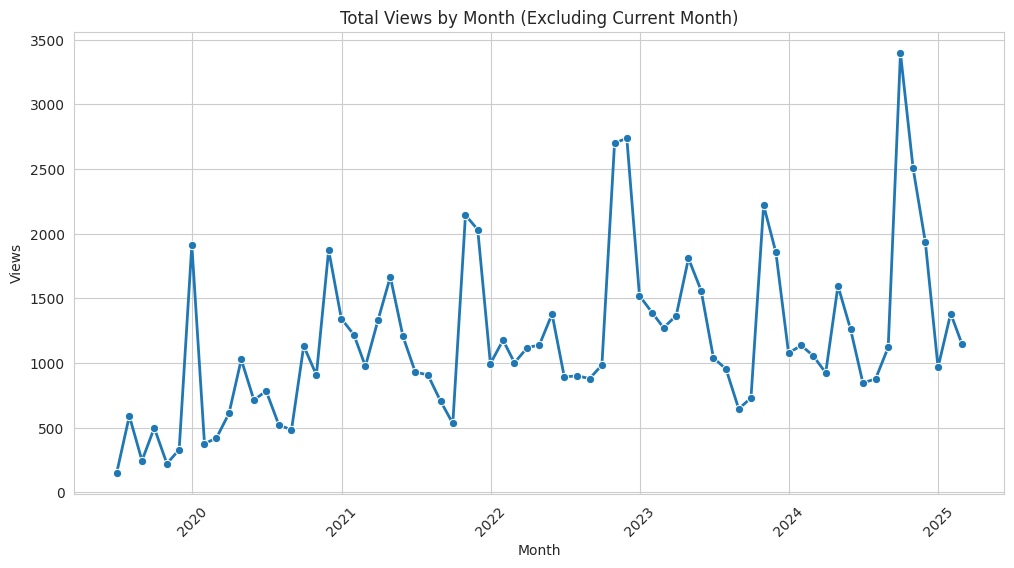

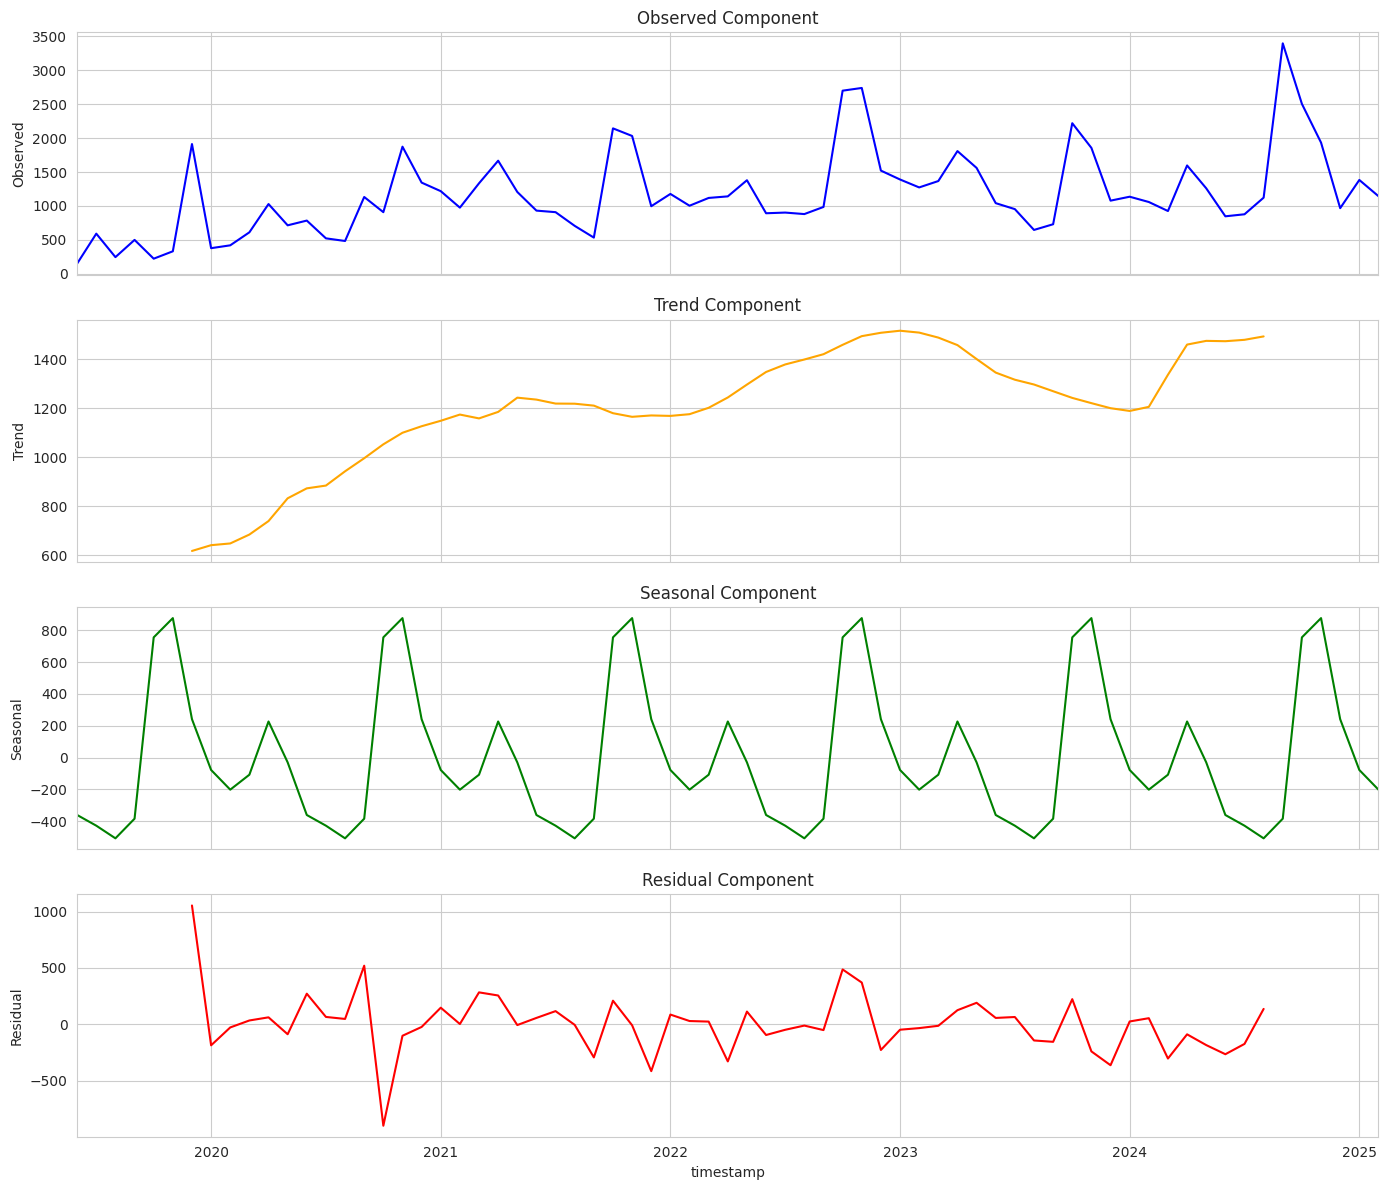

### Real Analysis

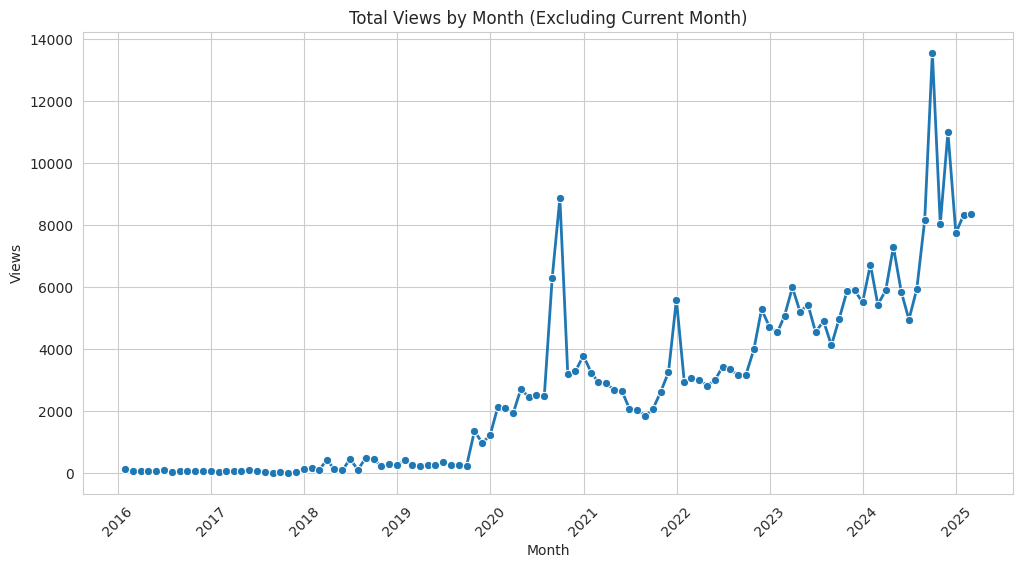

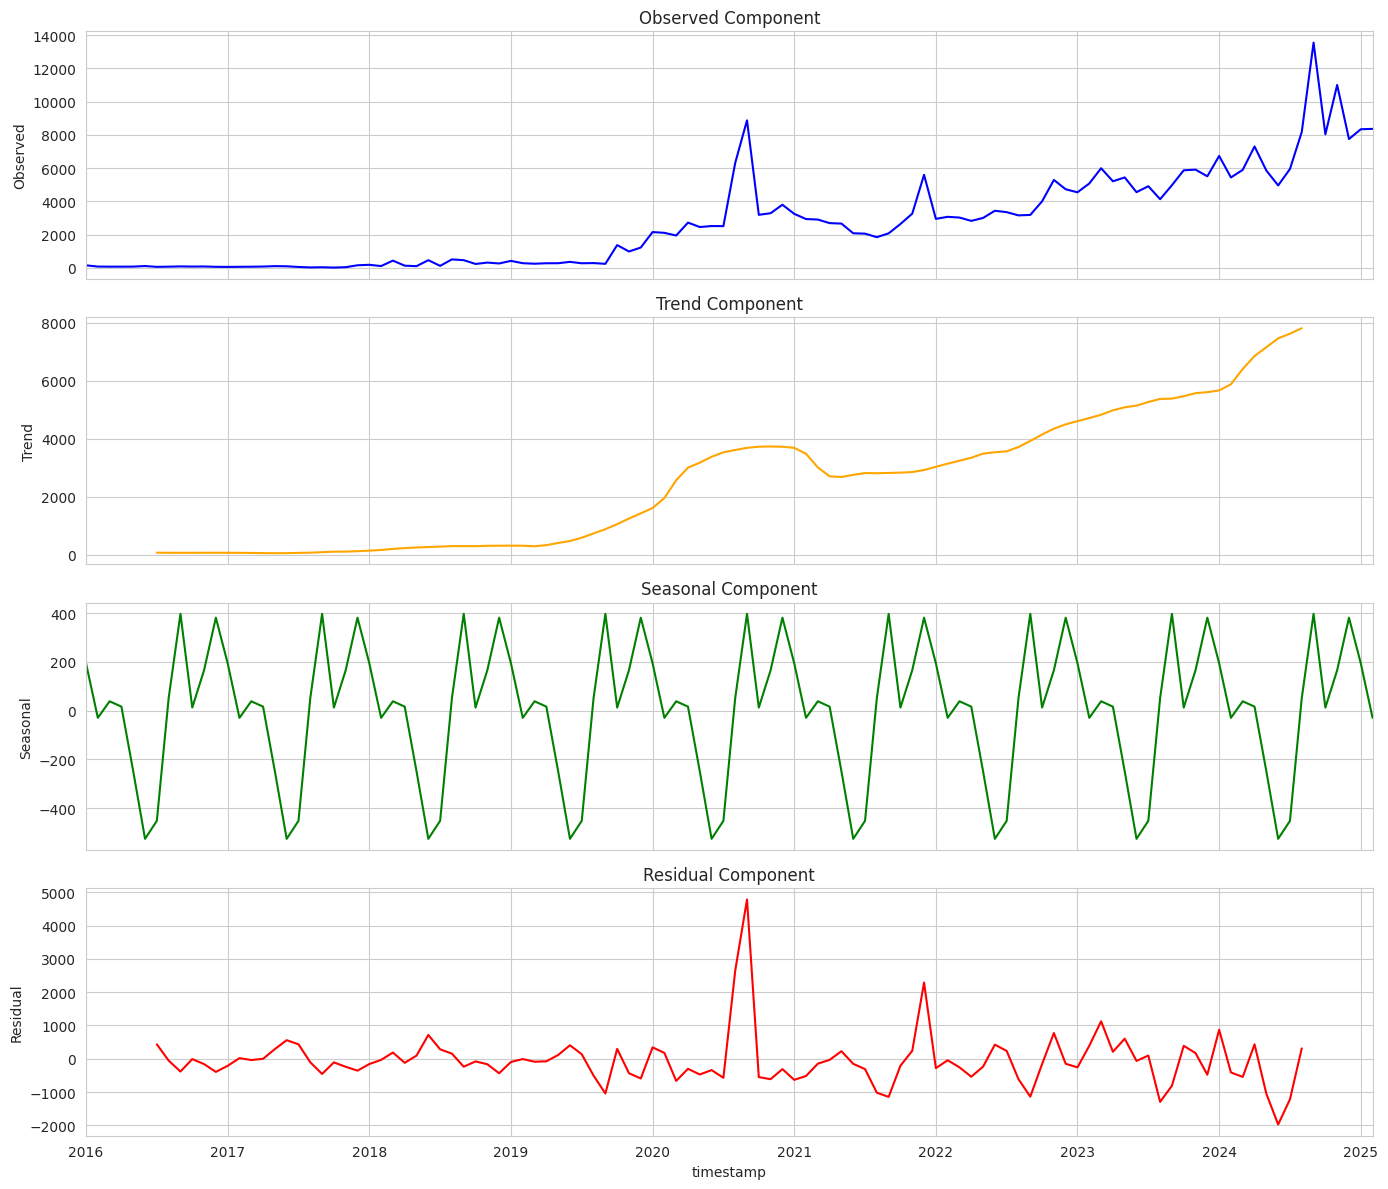

### Linear algebra

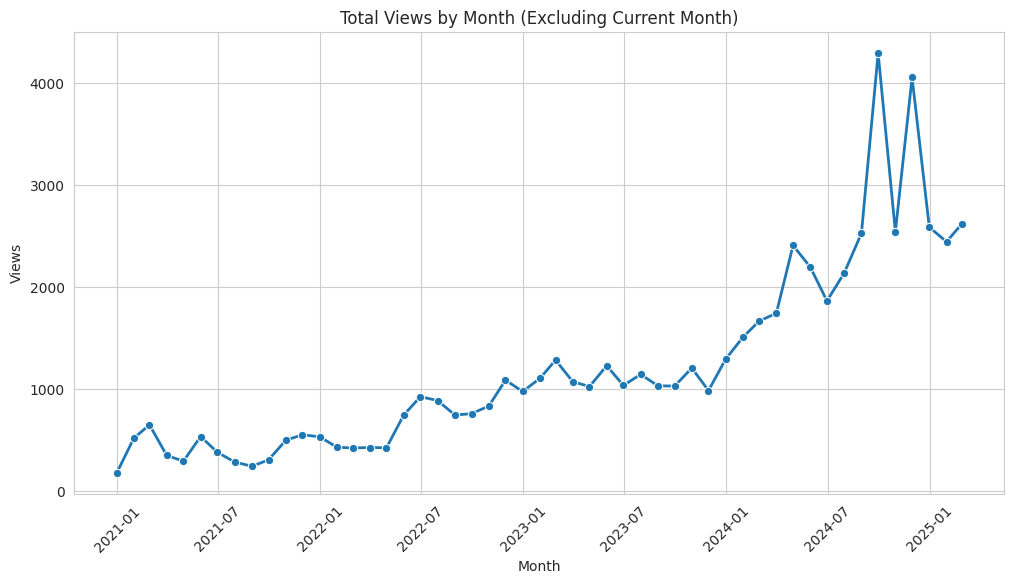

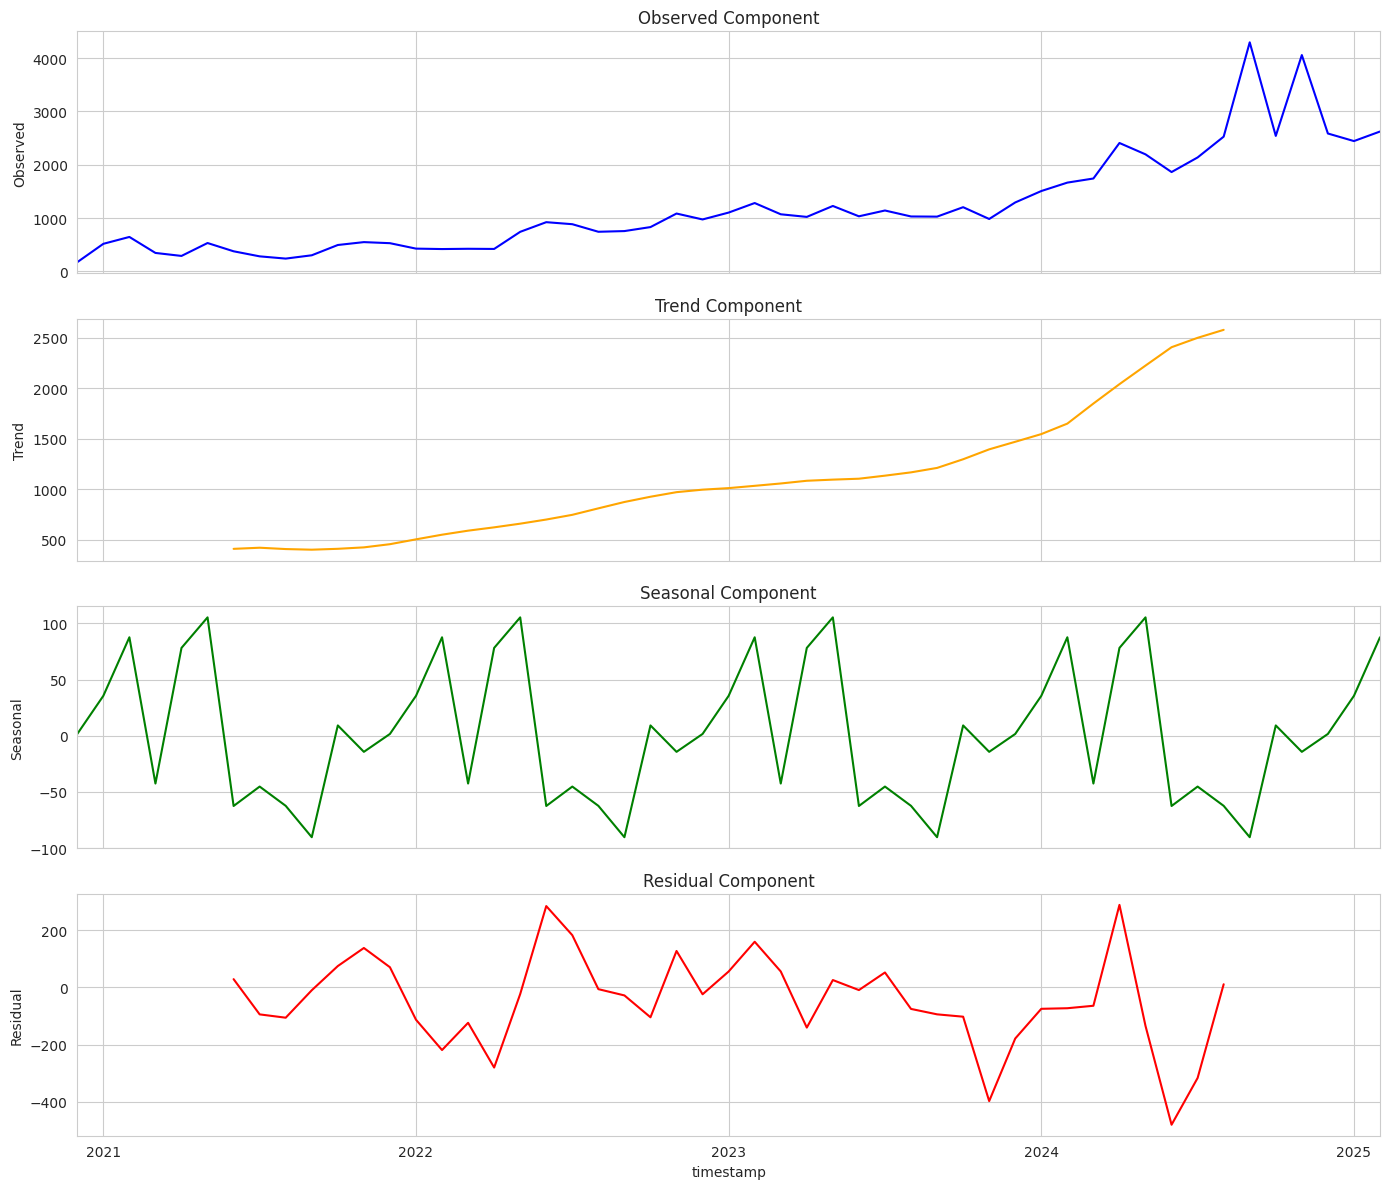

### Measure theory

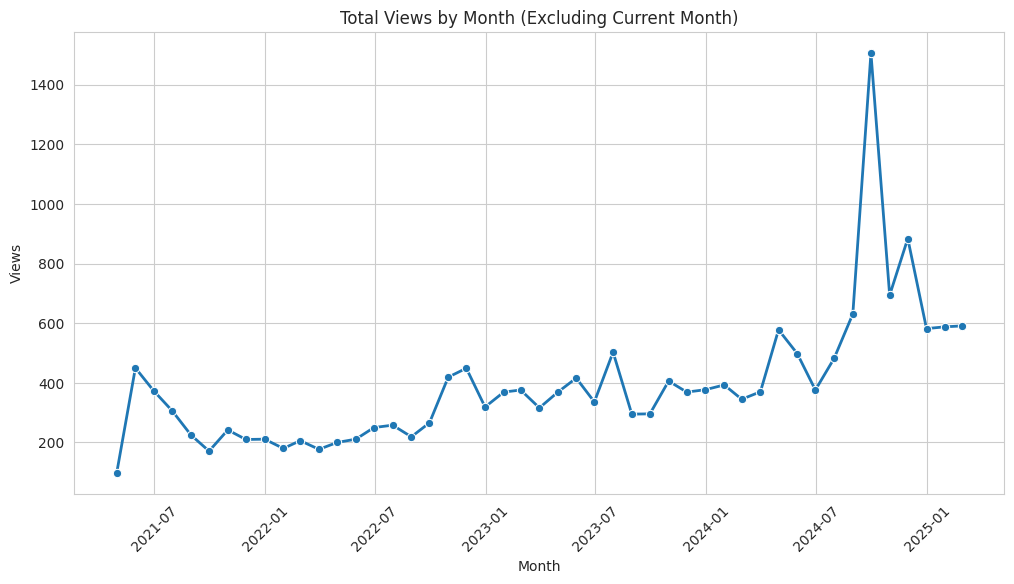

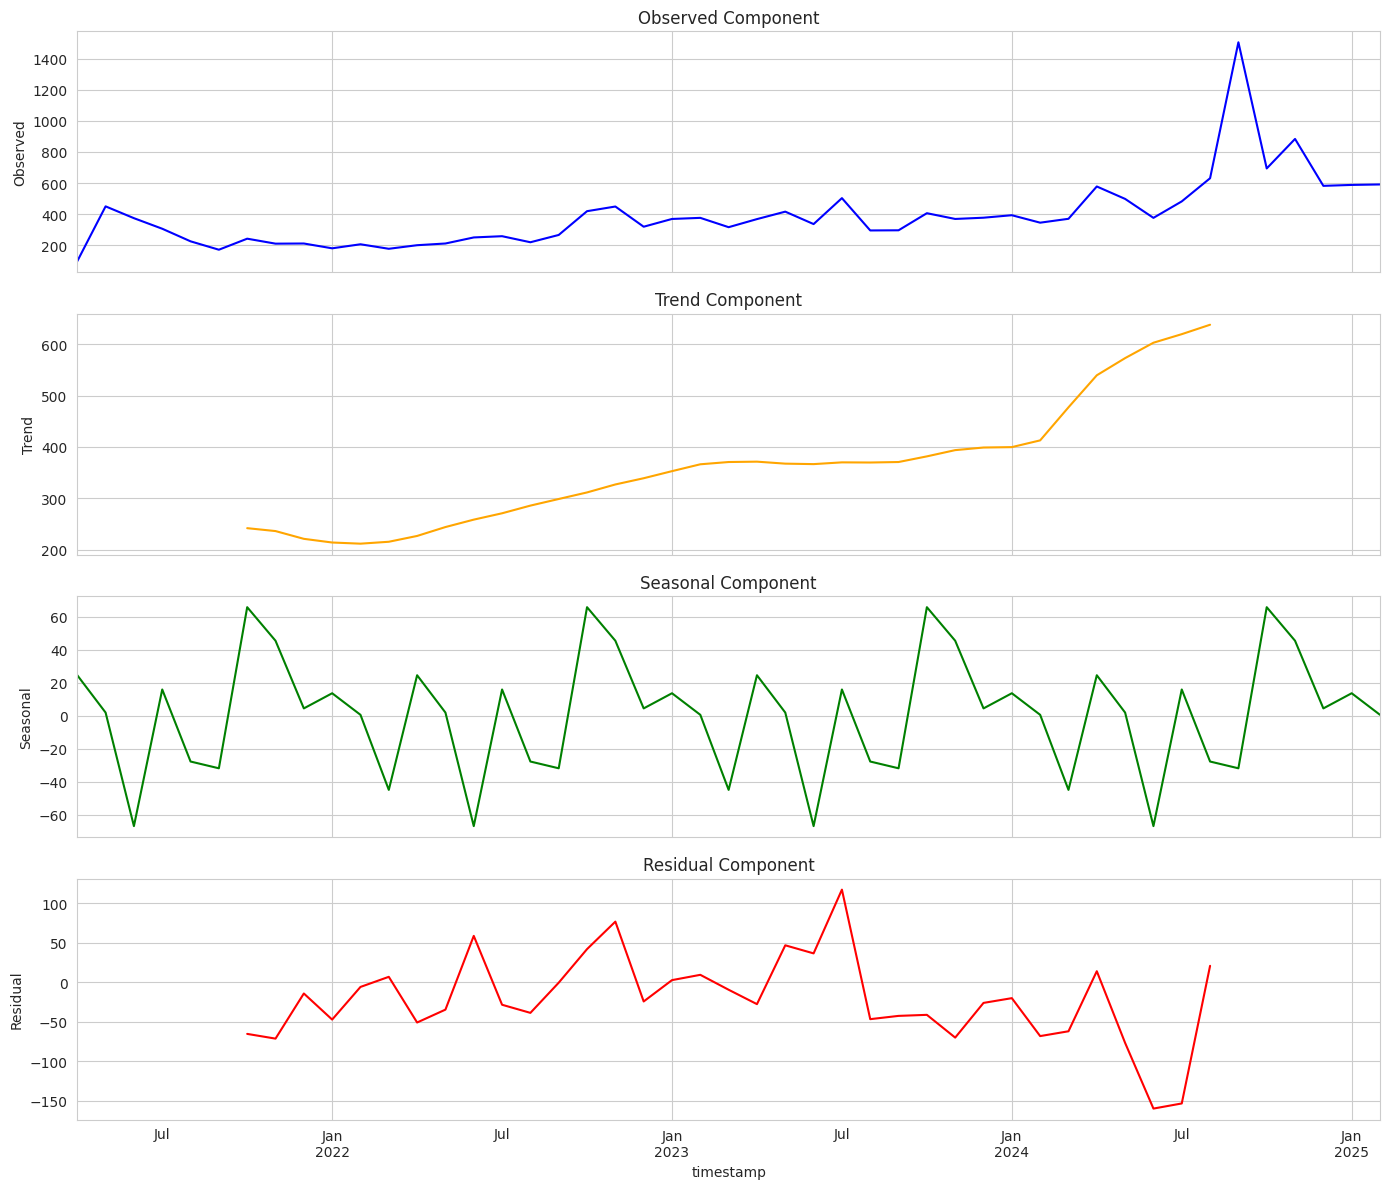

In [13]:
from mfnf import books

for book in books:
    md(f"### {book}")
    show_trend_analysis(df[df["book_name"] == book].copy())